# Bias–Variance Trade-off in Polynomial Regression  
Visualizing underfitting, good fit, and overfitting using synthetic data.


In [10]:
import numpy as np, matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

np.random.seed(0)
X = np.linspace(0, 1, 40).reshape(-1, 1)
y_true = np.sin(2 * np.pi * X).ravel()
y = y_true + np.random.randn(*y_true.shape) * 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


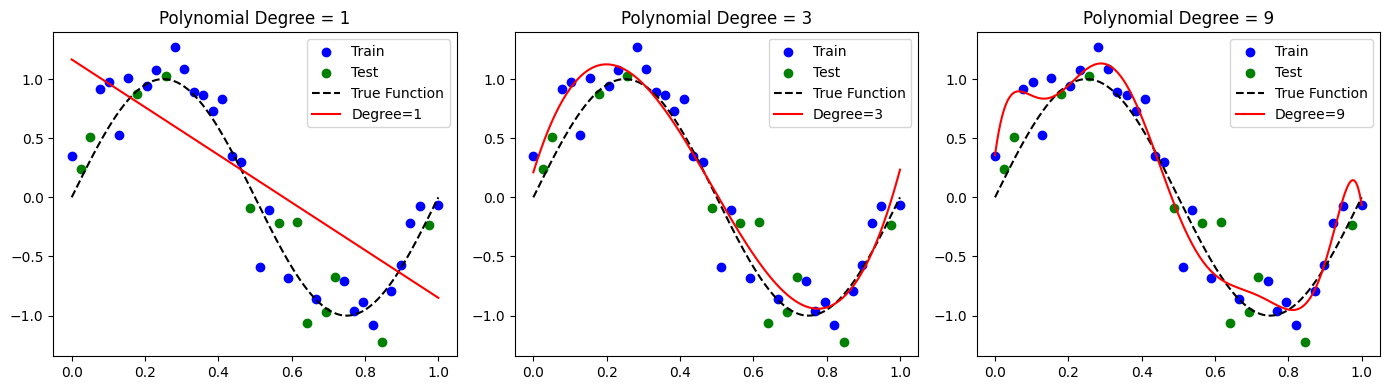

In [11]:
degrees = [1, 3, 9]
plt.figure(figsize=(14,4))

# Generate a smooth grid for plotting
X_plot = np.linspace(0, 1, 200).reshape(-1, 1)
y_true_plot = np.sin(2 * np.pi * X_plot)  # recompute true curve for 200 points

for i, d in enumerate(degrees, 1):
    poly = PolynomialFeatures(d)
    X_poly = poly.fit_transform(X_train)
    model = LinearRegression().fit(X_poly, y_train)

    y_pred = model.predict(poly.transform(X_plot))

    plt.subplot(1, 3, i)
    plt.scatter(X_train, y_train, color='blue', label='Train')
    plt.scatter(X_test, y_test, color='green', label='Test')
    plt.plot(X_plot, y_true_plot, 'k--', label='True Function')
    plt.plot(X_plot, y_pred, 'r', label=f'Degree={d}')
    plt.title(f'Polynomial Degree = {d}')
    plt.legend()

plt.tight_layout()
plt.show()


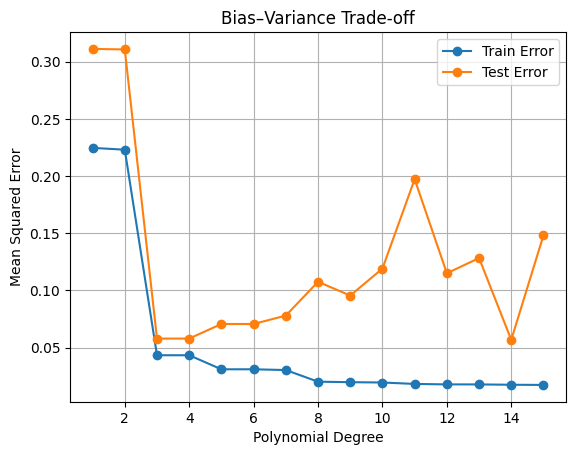

In [12]:
train_err, test_err = [], []
degs = range(1,16)
for d in degs:
    poly = PolynomialFeatures(d)
    Xtr = poly.fit_transform(X_train)
    Xte = poly.transform(X_test)
    model = LinearRegression().fit(Xtr, y_train)
    train_err.append(mean_squared_error(y_train, model.predict(Xtr)))
    test_err.append(mean_squared_error(y_test, model.predict(Xte)))

plt.plot(degs, train_err, 'o-', label='Train Error')
plt.plot(degs, test_err, 'o-', label='Test Error')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.legend(); plt.grid(); plt.title('Bias–Variance Trade-off')
plt.show()


- **Low-degree (1):** High bias, underfitting  
- **Moderate-degree (3–4):** Optimal trade-off  
- **High-degree (9+):** High variance, overfitting  

In learning-theory terms:
\[
\text{Expected Error} = (\text{Bias})^2 + \text{Variance} + \text{Irreducible Noise}.
\]
